<a href="https://www.dask.org/" target="_blank">
<img src="http://dask.readthedocs.io/en/latest/_images/dask_horizontal.svg"
     align="right"
     width="30%"
     alt="Dask logo\">
</a>

# Scalability

In this notebook, we will explain how Dask achieves scalability from multi-core local machines to large distributed clusters in the cloud for conducting large scale data analytics.

**Introduction**

Dask employs the **client-server model** to map computations to multiple cores in a single machine or distributed clusters. 

* In the client-side, a Python/Notebook application can send tasks (computations) to a **Dask Cluster**.
* A Dask Cluster is composed of a **scheduler** and the **workers**.
* The scheduler receives tasks (computations) and decide which worker will perform every task.
* The workers perform computations and store/share results with other workers.

<center>
<img src="img/dask-cluster.png" width="80%"/>
</center>
<center>
<a href="https://tutorial.dask.org/00_overview.html" target="_blank" width="30%"> Reference: Dask Tutorial Documentation </a>
</center>

**Content**

1. Cluster in a Local Machine.
2. Cluster in a High Performance Computing System.
3. Cluster in a Cloud Computing System.

**Learning outcomes**

## 1. Cluster in a Local Machine

You can define a local cluster in two ways [2].

* Implicitly, by using Dask default local cluster.
* Explicitly by defining a Dask local cluster by yourself.

### 1.1. Implicit cluster definition

In the implicit mode, the user doesn't have to define the cluster. Once the user defines a computation and uses the method `compute`, a default cluster is created for her. The default configuration uses all computer available cores. More information can be found in [2]. Let's take a look on this.

__1. Import required libraries, define required variables and functions__

In [2]:
import dask.array as da

In [3]:
x = da.random.random((10000,10000), chunks=(1000,1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

__2. Visualize the computations to be performed per array chunk.__

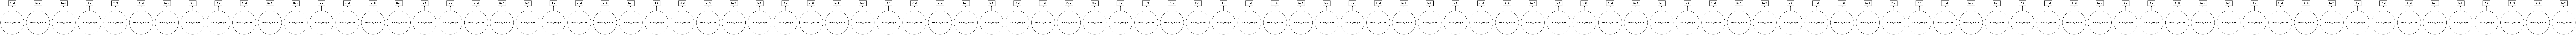

In [4]:
x.visualize() 

__3. Compute the result__

In [1]:
x.compute() # This uses Dask default local cluster

NameError: name 'x' is not defined

__4. Get `compute` method documentation for available parameters.__

_Hint: Advanced users can decide if they want to execute their computations using `threads` or `processes` by setting the scheduler parameter. In addition they can decide if they want their computations to run sequentially or in parallel by setting `synchronous`._

In [5]:
help(x.compute)

Help on method compute in module dask.base:

compute(**kwargs) method of dask.array.core.Array instance
    Compute this dask collection
    
    This turns a lazy Dask collection into its in-memory equivalent.
    For example a Dask array turns into a NumPy array and a Dask dataframe
    turns into a Pandas dataframe.  The entire dataset must fit into memory
    before calling this operation.
    
    Parameters
    ----------
    scheduler : string, optional
        Which scheduler to use like "threads", "synchronous" or "processes".
        If not provided, the default is to check the global settings first,
        and then fall back to the collection defaults.
    optimize_graph : bool, optional
        If True [default], the graph is optimized before computation.
        Otherwise the graph is run as is. This can be useful for debugging.
    kwargs
        Extra keywords to forward to the scheduler function.
    
    See Also
    --------
    dask.compute



### 1.2. Explicit cluster definition

Advanced user prefer to define the cluster by themsleves, i.e., explicitly, this give to them more flexibility for the configuration of the cluster. For example, they can define how many workers they want to use and how much memory they want these workers to have. 

In the explicit mode, you can define a cluster in one of two ways:
* By defining the client
* By defining the cluster and the client

__1. Import required libraries, define required variables and functions__

In [2]:
from dask.distributed import Client

__2. Create a cluster by defining the client__

_Hint: The creation of the client, implies the creation of a cluster._

In [7]:
client = Client(interface="eth1")
client

/home/vagrant/env/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40677 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.33.10:40677/status,
Dashboard: http://192.168.33.10:40677/status,Workers: 2
Total threads: 2,Total memory: 3.83 GiB
Status: running,Using processes: True
Comm: tcp://192.168.33.10:41157,Workers: 2
Dashboard: http://192.168.33.10:40677/status,Total threads: 2
Started: Just now,Total memory: 3.83 GiB
Comm: tcp://192.168.33.10:32995,Total threads: 1
Dashboard: http://192.168.33.10:43113/status,Memory: 1.92 GiB
Nanny: tcp://192.168.33.10:40659,


In [8]:
# Shutdown the connected scheduler and workers 
client.shutdown()

# Print scheduler info
cluster_info

NameError: name 'cluster_info' is not defined

2023-06-14 21:56:18,112 - tornado.application - ERROR - Uncaught exception GET /status/ws (192.168.33.1)
HTTPServerRequest(protocol='http', host='192.168.33.10:8787', method='GET', uri='/status/ws', version='HTTP/1.1', remote_ip='192.168.33.1')
Traceback (most recent call last):
  File "/home/vagrant/env/lib/python3.10/site-packages/tornado/websocket.py", line 937, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home/vagrant/env/lib/python3.10/site-packages/tornado/web.py", line 3290, in wrapper
    return method(self, *args, **kwargs)
  File "/home/vagrant/env/lib/python3.10/site-packages/bokeh/server/views/ws.py", line 149, in open
    raise ProtocolError("Token is expired.")
bokeh.protocol.exceptions.ProtocolError: Token is expired.


## 2. Cluster in a High Performance Computing System

## 3. Cluster in a Cloud Computing System

# [Excerise 3](labs/Lab3.ipynb)

# References

1. Deploy Dask Clusters - https://docs.dask.org/en/stable/deploying.html
2. Single-Machine Scheduler - https://www.devdoc.net/python/dask-2.23.0-doc/setup/single-machine.html
3. Getting Started with Dask: A Dask Setup Guide - https://www.youtube.com/watch?v=TQM9zIBzNBo&t=82s
4. Scheduler Overview - https://docs.dask.org/en/stable/scheduler-overview.html

In [9]:
import dask 

help(dask.config.get)

Help on function get in module dask.config:

get(key: 'str', default: 'Any' = '__no_default__', config: 'dict' = {'temporary-directory': None, 'visualization': {'engine': None}, 'tokenize': {'ensure-deterministic': False}, 'dataframe': {'backend': 'pandas', 'shuffle': {'method': None, 'compression': None}, 'parquet': {'metadata-task-size-local': 512, 'metadata-task-size-remote': 1}, 'convert-string': False}, 'array': {'backend': 'numpy', 'rechunk': {'method': 'tasks'}, 'svg': {'size': 120}, 'slicing': {'split-large-chunks': None}, 'chunk-size': '128MiB', 'rechunk-threshold': 4}, 'optimization': {'annotations': {'fuse': True}, 'fuse': {'active': None, 'ave-width': 1, 'max-width': None, 'max-height': inf, 'max-depth-new-edges': None, 'subgraphs': None, 'rename-keys': True}}}, override_with: 'Any | None' = None) -> 'Any'
    Get elements from global config
    
    If ``override_with`` is not None this value will be passed straight back.
    Useful for getting kwarg defaults from Dask con